Cirrhosis, also known as liver cirrhosis or hepatic cirrhosis, and end-stage liver disease, is the impaired liver function caused by the formation of scar tissue known as fibrosis due to damage caused by liver disease.

# Importing the libraries

In [ ]:
import pandas as pd #for reading the dataset
import numpy as np #for mathematical processing
import matplotlib.pyplot as plt # for plotting the dataset
import seaborn as sns # for presenting the dataset
from sklearn.model_selection import train_test_split #for splitting the dataset
from sklearn.linear_model import LogisticRegression #model used
from sklearn.metrics import accuracy_score #for evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")

# Exploring the dataset

In [ ]:
data.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [ ]:
data.shape

(418, 20)

In [ ]:
datatypes=data.dtypes
print(datatypes)

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [ ]:
data.memory_usage()

Index             128
ID               3344
N_Days           3344
Status           3344
Drug             3344
Age              3344
Sex              3344
Ascites          3344
Hepatomegaly     3344
Spiders          3344
Edema            3344
Bilirubin        3344
Cholesterol      3344
Albumin          3344
Copper           3344
Alk_Phos         3344
SGOT             3344
Tryglicerides    3344
Platelets        3344
Prothrombin      3344
Stage            3344
dtype: int64

In [ ]:
memory_before = data.memory_usage().sum() / (1024**2)

In [ ]:
memory_before

0.06390380859375

In [ ]:
data['Cholesterol'] = data['Cholesterol'].astype('Int64')
data['Copper'] = data['Copper'].astype('Int64')
data['Tryglicerides'] = data['Tryglicerides'].astype('Int64')
data['Platelets'] = data['Platelets'].astype('Int64')
data['Stage'] = data['Stage'].astype('Int64')

In [ ]:
datatypes=data.dtypes
print(datatypes)

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol        Int64
Albumin          float64
Copper             Int64
Alk_Phos         float64
SGOT             float64
Tryglicerides      Int64
Platelets          Int64
Prothrombin      float64
Stage              Int64
dtype: object


In [ ]:
data.memory_usage()

Index             128
ID               3344
N_Days           3344
Status           3344
Drug             3344
Age              3344
Sex              3344
Ascites          3344
Hepatomegaly     3344
Spiders          3344
Edema            3344
Bilirubin        3344
Cholesterol      3762
Albumin          3344
Copper           3762
Alk_Phos         3344
SGOT             3344
Tryglicerides    3762
Platelets        3762
Prothrombin      3344
Stage            3762
dtype: int64

In [ ]:
memory_after = data.memory_usage().sum() / (1024**2)

In [ ]:
memory_after

0.06589698791503906

In [ ]:
data.describe()

ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000        284.0   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000        120.0   
25%    105.250000  1092.750000  15644.500000    0.800000        249.5   
50%    209.500000  1730.000000  18628.000000    1.400000        309.5   
75%    313.750000  2613.500000  21272.500000    3.400000        400.0   
max    418.000000  4795.000000  28650.000000   28.000000       1775.0   

          Albumin     Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000      310.0    312.000000  312.000000          282.0   
mean     3.497440  97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.61392   2140.388824   56.699525      65.148639   
min      1.960000        4.0    289.000000   26.350000           33.0   
25%      3.242500      41.25    871.500000   80.600000          84.25   
50%      3.530000       73.0   1259.000000  114.700000          108.0   
75%      3.770000      123.0   1980.000000  151.900000          151.0   
max      4.640000      588.0  13862.400000  457.250000          598.0   

       Platelets  Prothrombin     Stage  
count      407.0   416.000000     412.0  
mean   257.02457    10.731731  3.024272  
std    98.325585     1.022000  0.882042  
min         62.0     9.000000       1.0  
25%        188.5    10.000000       2.0  
50%        251.0    10.600000       3.0  
75%        318.0    11.100000       4.0  
max        721.0    18.000000       4.0



---



# Cirrhosis Prediction | 2. EDA
-> Perform Univariate and Multivariate analysis and draw conclusions from there.

-> Explore Correlation Matrix(can try different methods and search if they give the same conclusion and why)

-> Check the distribution(skewness) of the columns

-> Detect Outliers(don't remove)

-> Detect Class Label Imbalance

1. Perform Univariate and Multivariate analysis and draw conclusions from there.

<Axes: xlabel='N_Days', ylabel='Count'>

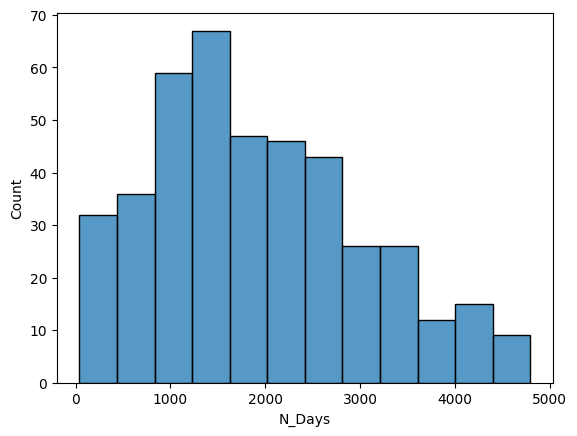

In [ ]:
sns.histplot(data['N_Days']) #histogram plot for N_Days

<Axes: ylabel='N_Days'>

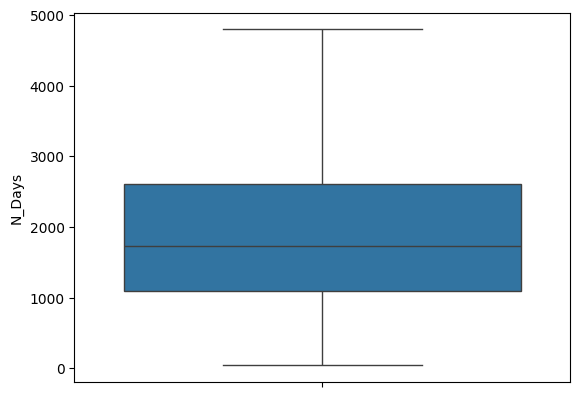

In [ ]:
sns.boxplot(data['N_Days'])

we can see from above graph feature is well distributed towards both extremes , showing that dataset includes all the data between 0-5000 days



---



<Axes: xlabel='Status', ylabel='Count'>

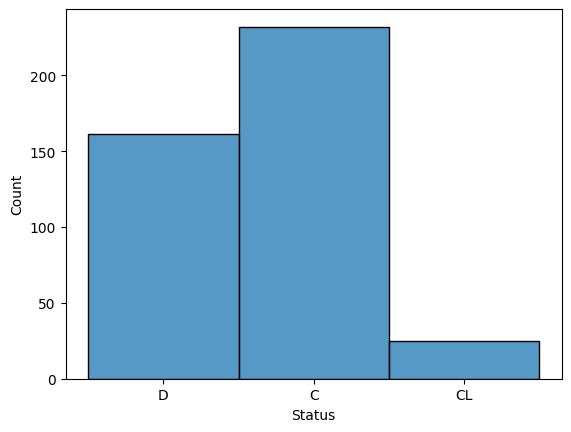

In [ ]:
sns.histplot(data['Status']) # histogram plot for status

we can see that the distribution is imbalanced between the class of C,D and CL, there are more number of censored cases followed by death cases and least cases in censored due to liver transplant



---



<Axes: xlabel='Drug', ylabel='Count'>

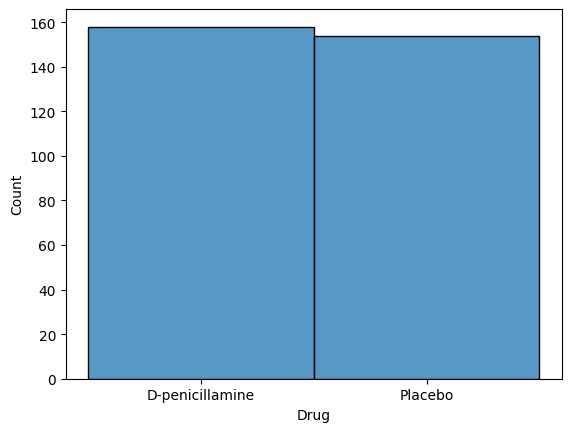

In [ ]:
sns.histplot(data['Drug'])

We can see that the distribution is somewhere similar for both the class. There are nearly 160 cases of D- penicillamine and nearly 150 cases of placebo drug




---



<Axes: xlabel='Age', ylabel='Count'>

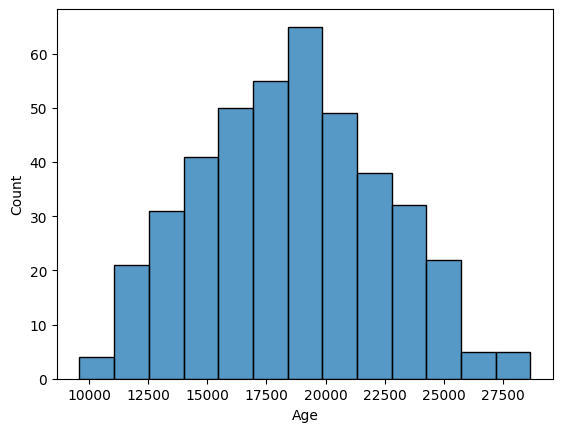

In [ ]:
sns.histplot(data['Age'])

<Axes: ylabel='Age'>

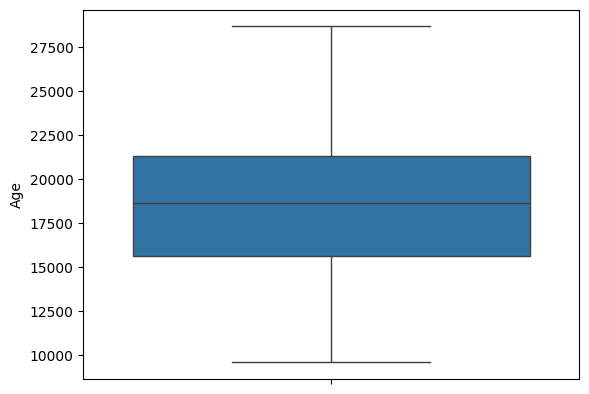

In [ ]:
sns.boxplot(data['Age'])

we can see from above graph, how Age is well distributed towards both extremes, showing how the dataset has incorporated people as young as in their early twenties to as old as in theirs late eighties, leading to high inclusivity.

<Axes: xlabel='Sex', ylabel='Count'>

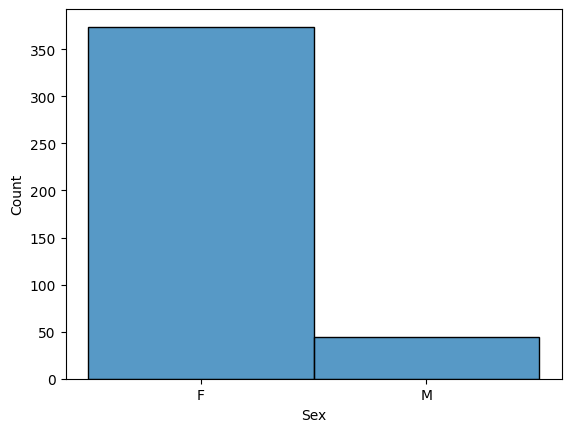

In [ ]:
sns.histplot(data['Sex'])

from above histogram, we can see the class imbalance for Sex is large, the cases of Female is more than 350 and for male is 50
this suggests unequal participation of both Sexes in the survey.

<Axes: xlabel='Ascites', ylabel='Count'>

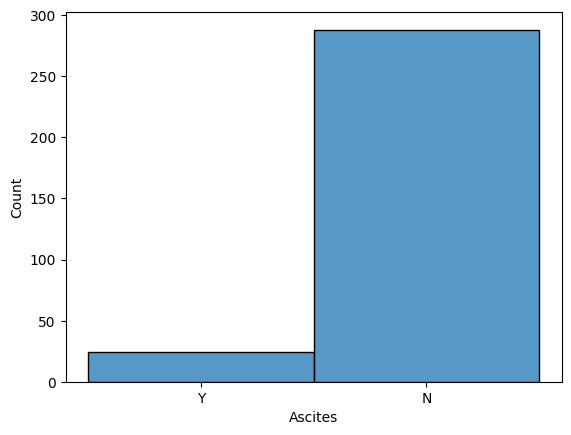

In [ ]:
sns.histplot(data['Ascites'])

we can see that the count of pateint without the presence of Ascites is large.
This shows unequal participation of feature

<Axes: xlabel='Hepatomegaly', ylabel='Count'>

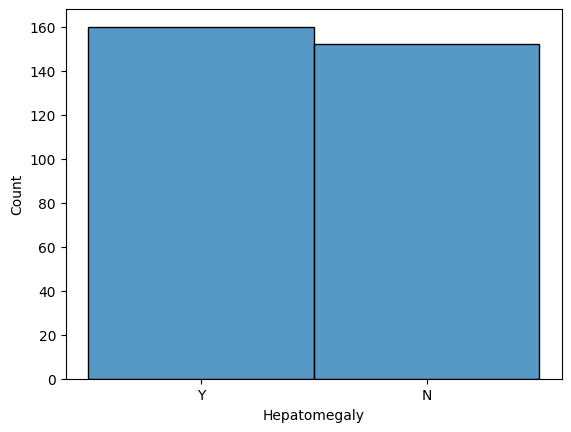

In [ ]:
sns.histplot(data['Hepatomegaly'])


from above histogram, we can see the class imbalance for Hepatomegaly is near minimal, both being around 160 cases.

this suggests equal participation of both classes in the survey.

<Axes: xlabel='Spiders', ylabel='Count'>

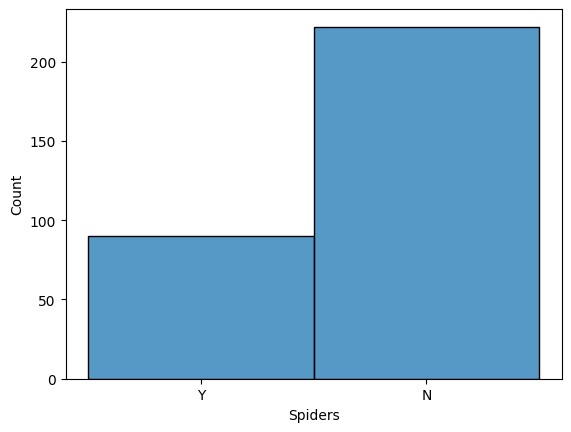

In [ ]:
sns.histplot(data['Spiders'])

we can see that the count of pateint without the presence of Spiders is large. This shows unequal participation of feature

<Axes: xlabel='Edema', ylabel='Count'>

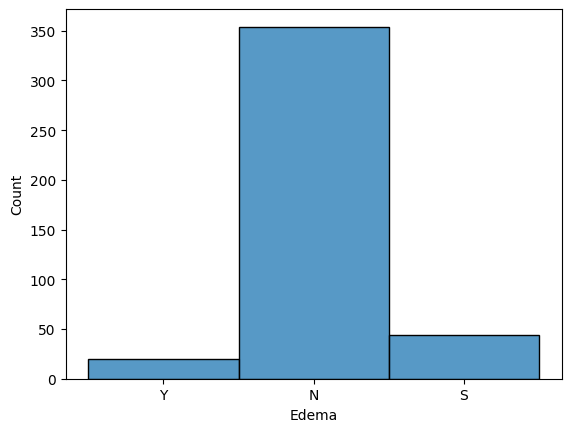

In [ ]:
sns.histplot(data['Edema'])

we can see that the count of pateint without the presence of edema with no diuretic therapy is large. This shows unequal participation of feature

<Axes: xlabel='Bilirubin', ylabel='Count'>

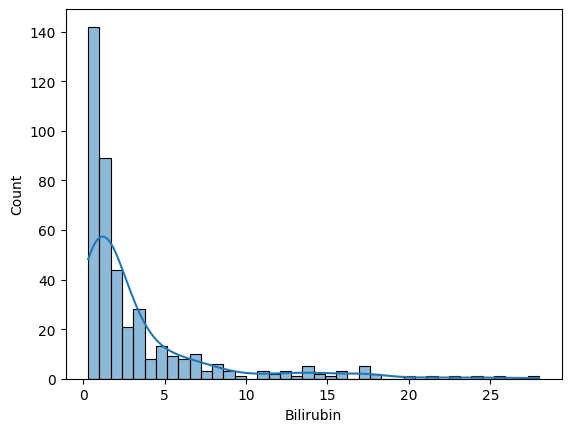

In [ ]:
sns.histplot(data['Bilirubin'], kde=True)

<Axes: ylabel='Bilirubin'>

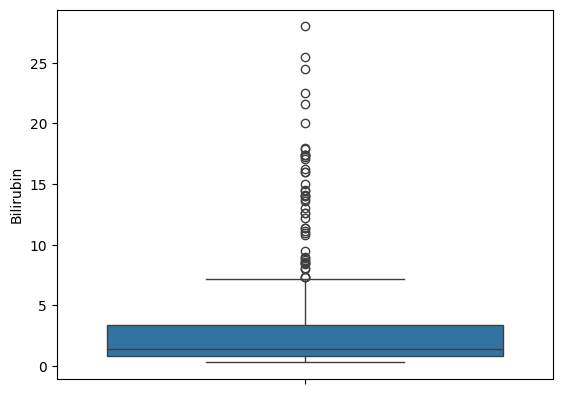

In [ ]:
sns.boxplot(data['Bilirubin'])


the Bilirubin distribution suggests, that the average participant is in the mean value of around 1 and no. of cases at 140
based on boxplot: has outliers

<Axes: xlabel='Cholesterol', ylabel='Count'>

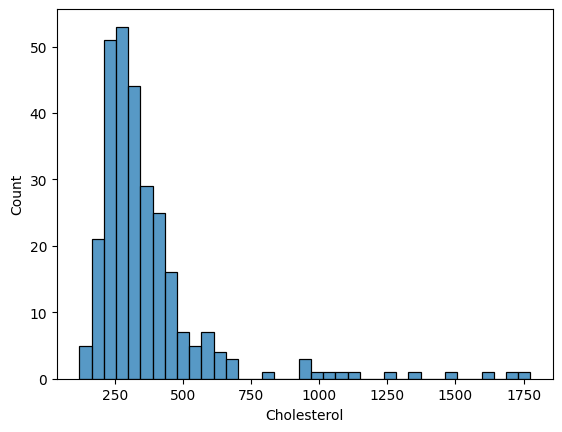

In [ ]:
sns.histplot(data['Cholesterol'])

<Axes: ylabel='Cholesterol'>

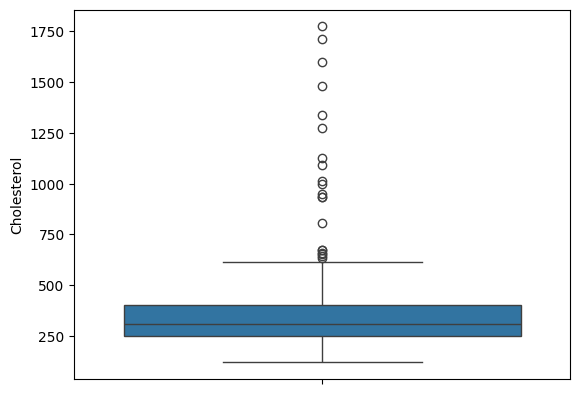

In [ ]:
sns.boxplot(data['Cholesterol'])

the Cholesterol level graph suggests participants being in the prediabetic stages.

based on boxplot: contains outliers

<Axes: xlabel='Albumin', ylabel='Count'>

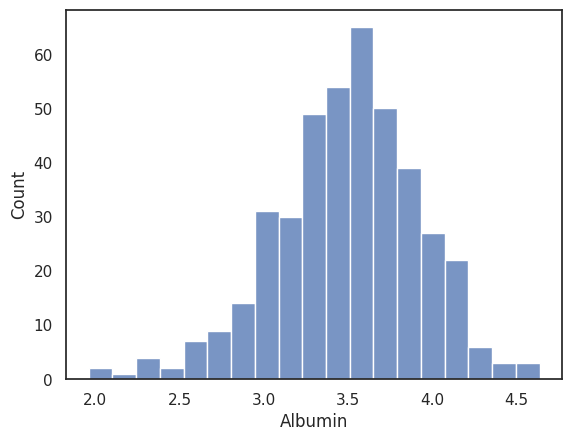

In [ ]:
sns.histplot(data['Albumin'])

<Axes: ylabel='Albumin'>

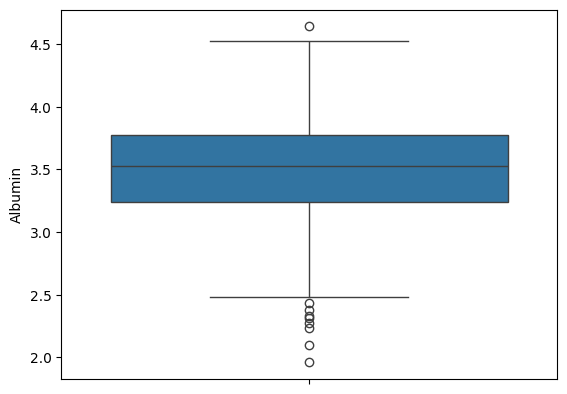

In [ ]:
sns.boxplot(data['Albumin'])

The majority dataset belongs to the value 3.5

based on boxplot: contains outliers

<Axes: xlabel='Copper', ylabel='Count'>

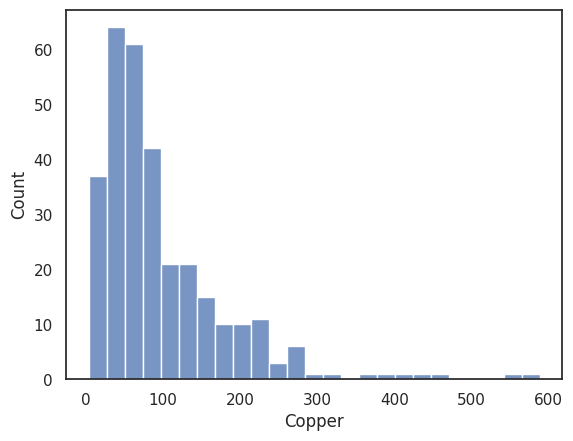

In [ ]:
sns.histplot(data['Copper'])

<Axes: ylabel='Copper'>

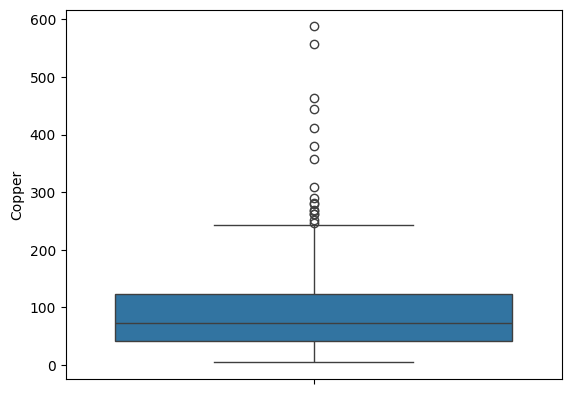

In [ ]:
sns.boxplot(data['Copper'])

copper presence in participants show a tendency of being on borderline high and may well be high based on graph and safe limits.

based on boxplot: contains outlier

<Axes: xlabel='Alk_Phos', ylabel='Count'>

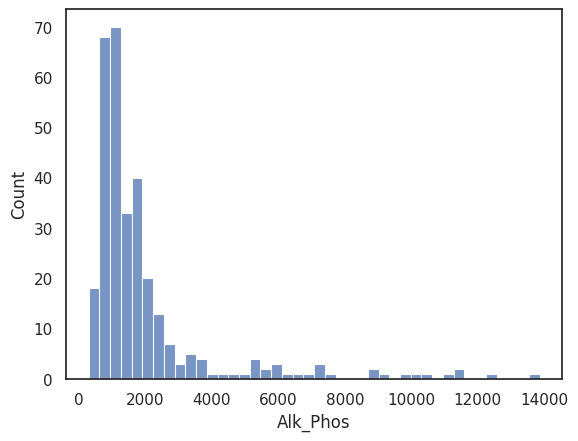

In [ ]:
sns.histplot(data['Alk_Phos'])

<Axes: ylabel='Alk_Phos'>

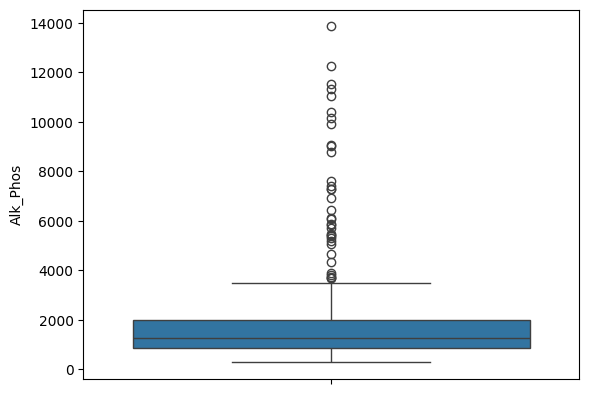

In [ ]:
sns.boxplot(data['Alk_Phos'])

Alk_phos presence in participants show a tendency of being on borderline high and may well be high based on graph and safe limits.

based on boxplot: contains outliers

<Axes: xlabel='SGOT', ylabel='Count'>

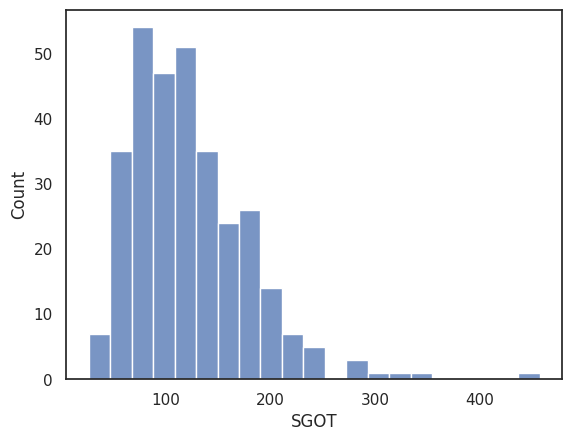

In [ ]:
sns.histplot(data['SGOT'])

<Axes: ylabel='SGOT'>

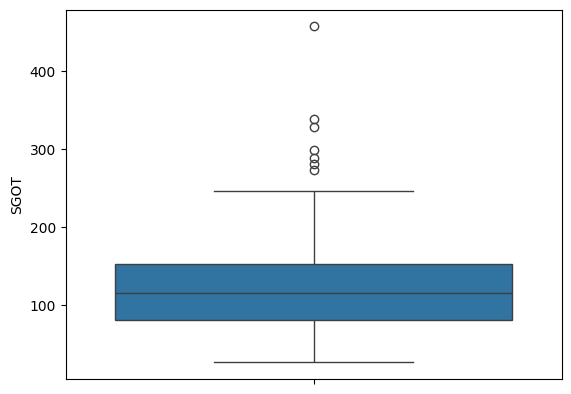

In [ ]:
sns.boxplot(data['SGOT'])

SGOT level in participants show a tendency of being on borderline high and may well be high based on graph and safe limits.

based on boxplot: contains outliers

<Axes: ylabel='Tryglicerides'>

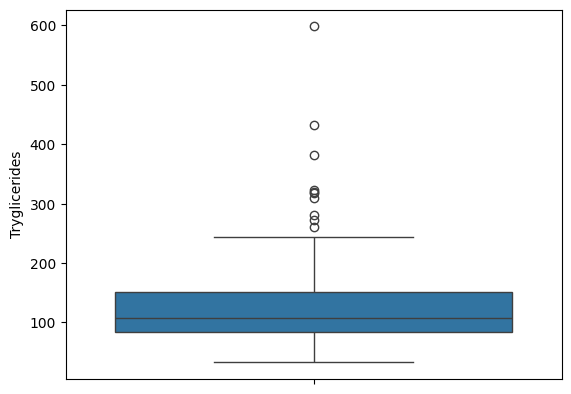

In [ ]:
sns.boxplot(data['Tryglicerides'])

triglycerides presence in participants show a tendency of being on borderline high and may well be high based on graph and safe limits.

based on boxplot: contains outliers

<Axes: ylabel='Platelets'>

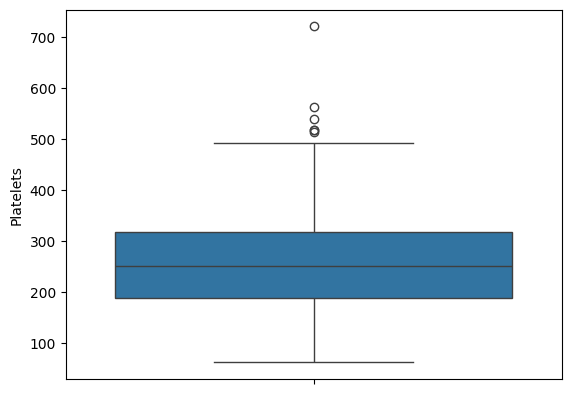

In [ ]:
sns.boxplot(data['Platelets'])

Platelets level in participants show a tendency of being on borderline high and may well be high based on graph and safe limits.

based on boxplot: contains outliers

<Axes: ylabel='Prothrombin'>

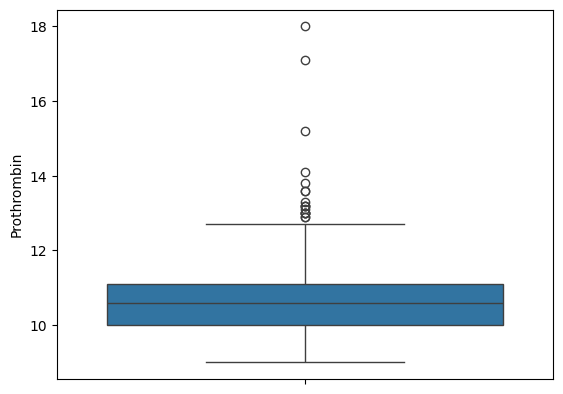

In [ ]:
sns.boxplot(data['Prothrombin'])

Prothrombin presence in participants show a tendency of being on borderline high and may well be high based on graph and safe limits.

based on boxplot: contains outliers

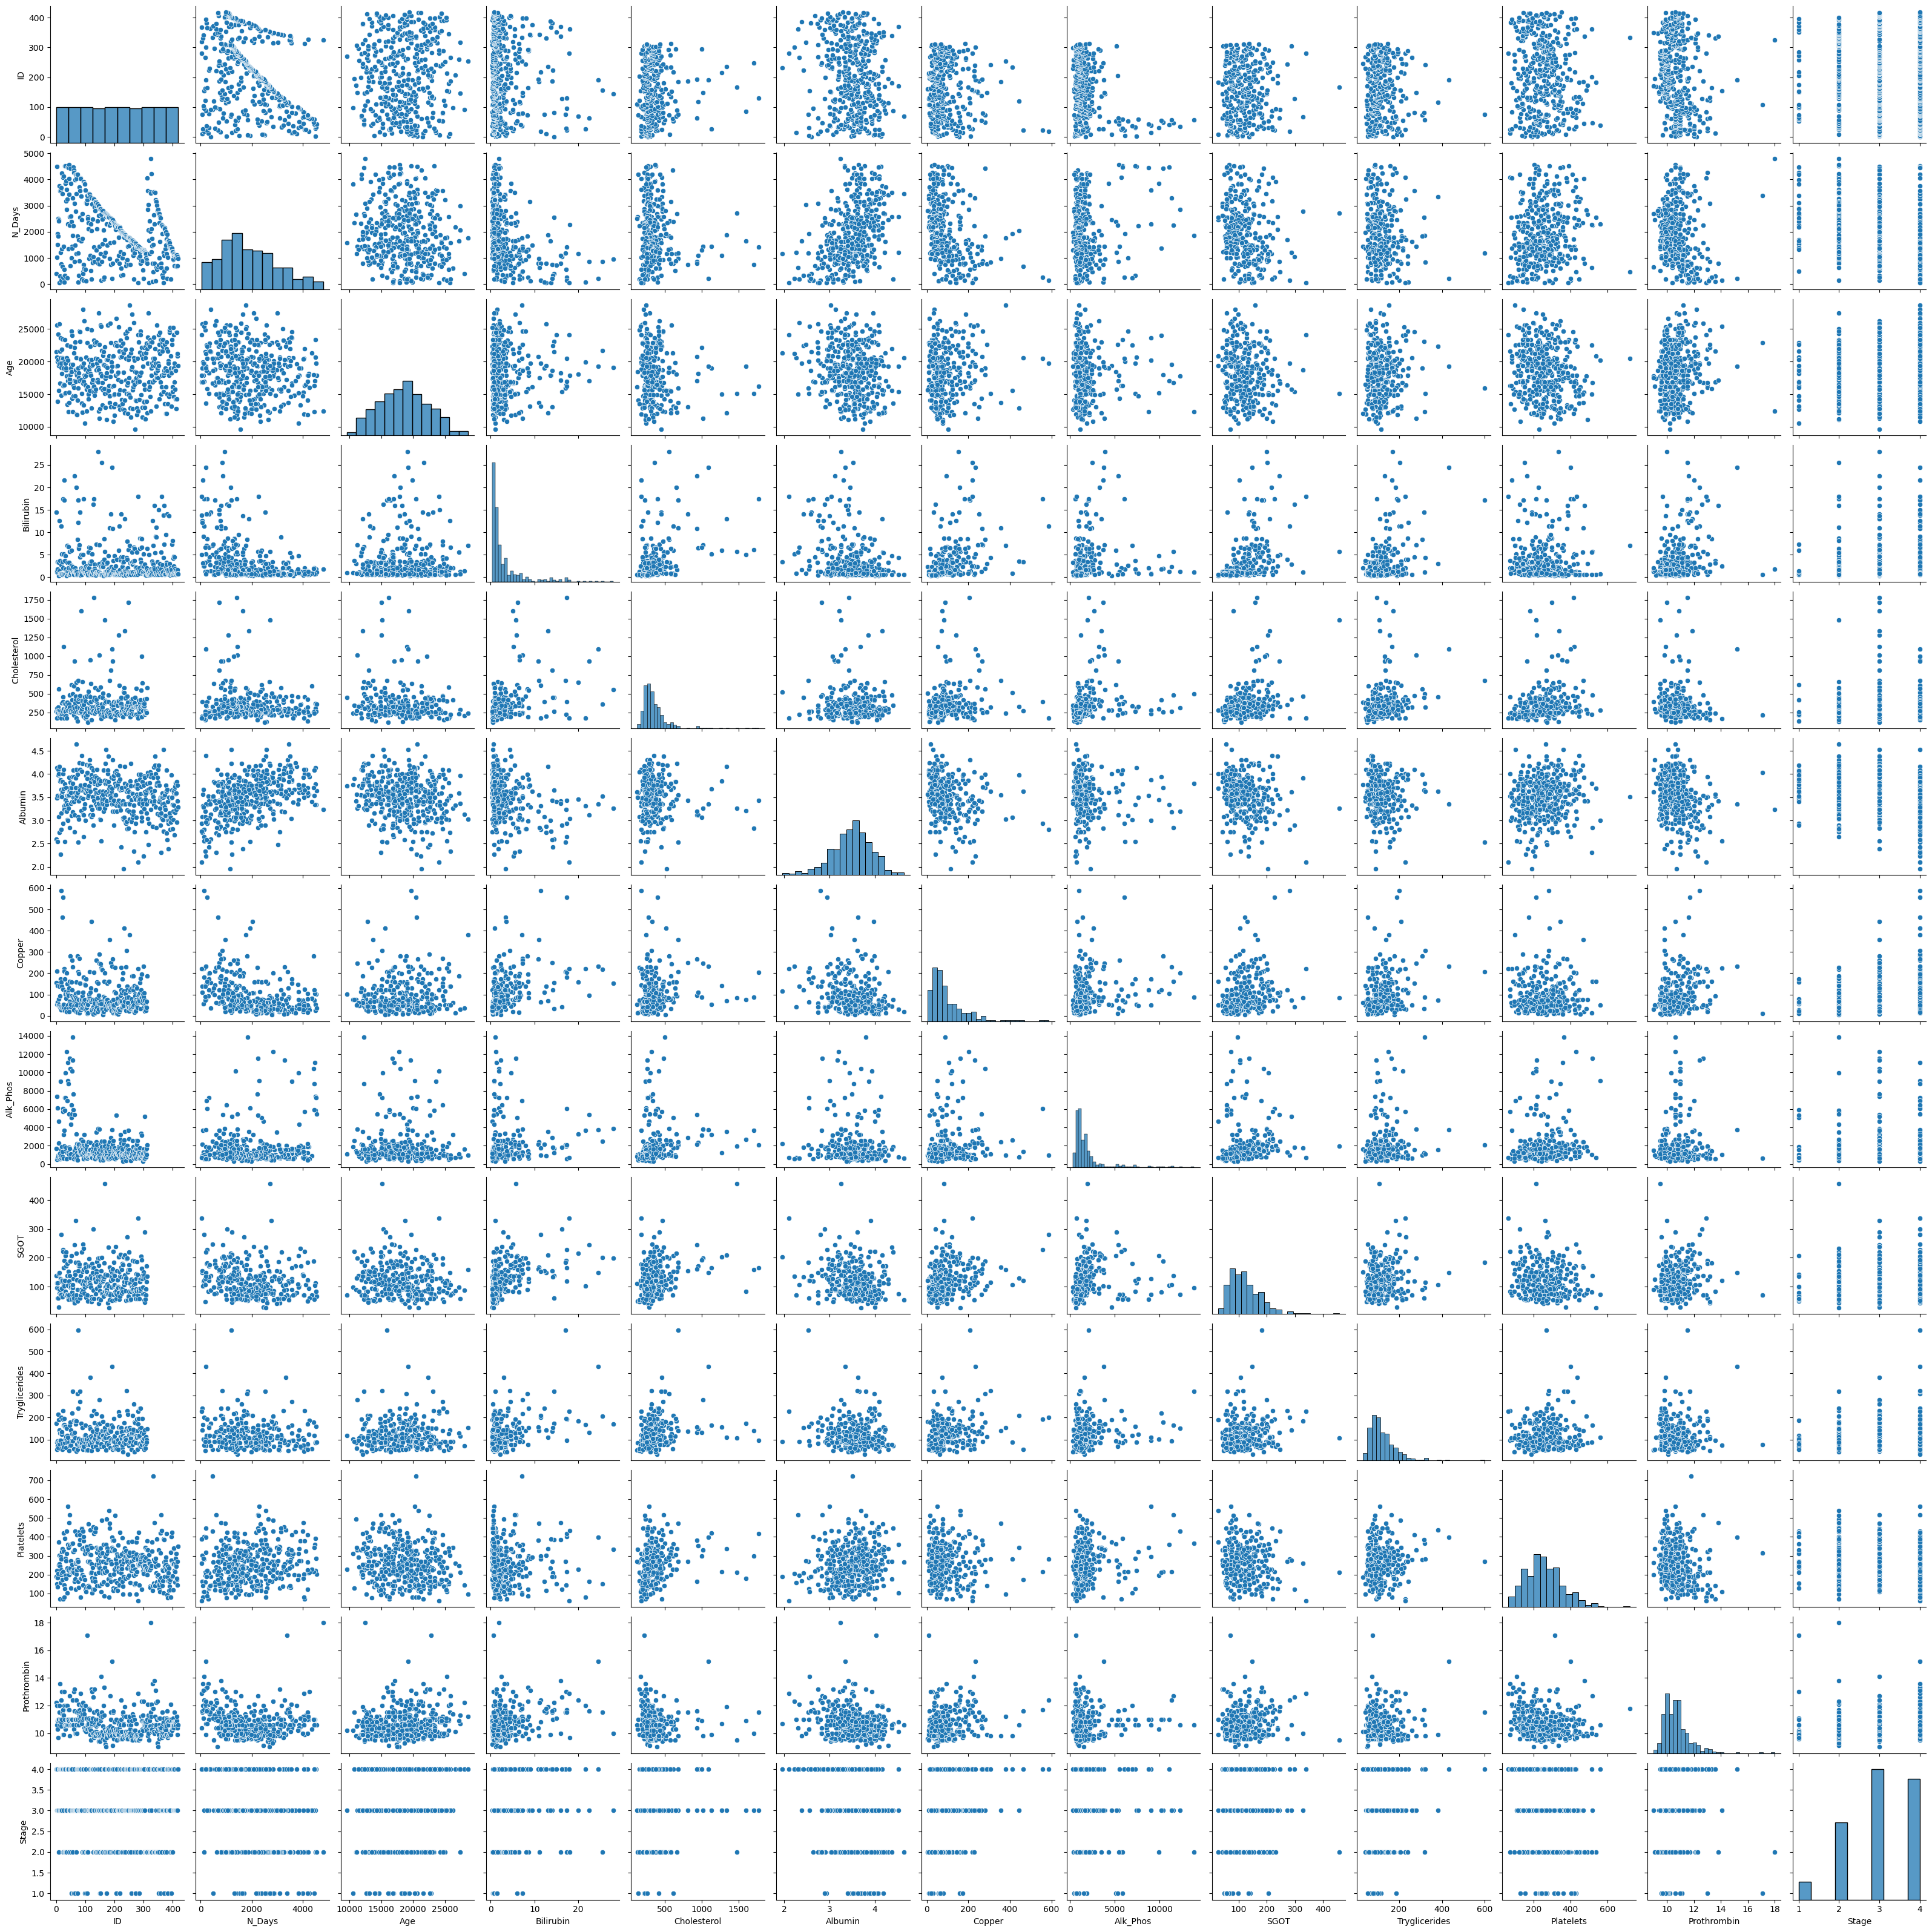

In [ ]:
from seaborn import pairplot

# Create a pairplot with all numerical variables in the data
pairplot(data)

**Strength of the Relationship:**

The points are scattered throughout the plot, and there's not a very tight cluster. This suggests a weak positive correlation.

**Outliers:**

There are a few data points that fall outside the main cluster, particularly at the higher end of the age range.

# Explore Correlation Matrix

Pearson correlational technique: Measures the linear relationship between two continuous variables. 1:1 relation, if one increases the other increases, and vice-versa. Linear

Spearman correlational technique: Measures the monotonic relationship between two variables, capturing all trends seen. as coeff increases, the correlation increases more. Non-linear

Kendall correlational technique: Measures the ordinal relationship between two variables, which means it captures the direction and significance of the ranking order. co-dependence is shown in a more concise way as importance of one influences the other more. Non-linear

In [ ]:
# convert categorical columns to numerical values
data.replace({'Status':{'C':0,'D':1,'CL':2},'Drug':{'D-penicillamine':0,'Placebo':1},'Sex':{'M':0,'F':1},
                      'Ascites':{'N':0,'Y':1},'Hepatomegaly':{'N':0,'Y':1}, 'Spiders':{'N':0, 'Y':1},'Edema':{'N':0,'S':1 ,'Y':2}},inplace=True)

In [ ]:
#lets find out the correlation between each attribute in the traindata
corr=data.corr()
corr

ID    N_Days    Status      Drug       Age       Sex  \
ID             1.000000 -0.354305 -0.172794 -0.037440  0.037136  0.083855   
N_Days        -0.354305  1.000000 -0.376827 -0.008362 -0.125934  0.007386   
Status        -0.172794 -0.376827  1.000000 -0.025830  0.022415 -0.099881   
Drug          -0.037440 -0.008362 -0.025830  1.000000 -0.134242  0.055567   
Age            0.037136 -0.125934  0.022415 -0.134242  1.000000 -0.163341   
Sex            0.083855  0.007386 -0.099881  0.055567 -0.163341  1.000000   
Ascites       -0.115519 -0.307135  0.206508 -0.044415  0.231841 -0.008688   
Hepatomegaly  -0.055818 -0.288141  0.298976  0.102935  0.075368 -0.050949   
Spiders       -0.096929 -0.266402  0.173932  0.008164 -0.050147  0.141379   
Edema         -0.159830 -0.304634  0.214533 -0.012370  0.196916 -0.033229   
Bilirubin     -0.062154 -0.403953  0.348628  0.085697  0.002362  0.027652   
Cholesterol    0.032897 -0.138236  0.193244  0.019148 -0.157620  0.011421   
Albumin       -0.128924  0.430829 -0.208872  0.009022 -0.182350 -0.030351   
Copper        -0.098663 -0.364809  0.351669  0.000060  0.061549 -0.240146   
Alk_Phos      -0.352856  0.149269  0.146357 -0.018316 -0.047247 -0.032161   
SGOT          -0.012097 -0.225492  0.251723  0.042007 -0.149869  0.003610   
Tryglicerides -0.034100 -0.153000  0.187985  0.008572  0.022065 -0.050511   
Platelets     -0.076699  0.151361  0.015405  0.033804 -0.148201  0.090594   
Prothrombin   -0.191930 -0.111470  0.212250  0.073213  0.113760 -0.070476   
Stage         -0.033757 -0.366193  0.280201  0.066298  0.189083 -0.017235   

                Ascites  Hepatomegaly   Spiders     Edema  Bilirubin  \
ID            -0.115519     -0.055818 -0.096929 -0.159830  -0.062154   
N_Days        -0.307135     -0.288141 -0.266402 -0.304634  -0.403953   
Status         0.206508      0.298976  0.173932  0.214533   0.348628   
Drug          -0.044415      0.102935  0.008164 -0.012370   0.085697   
Age            0.231841      0.075368 -0.050147  0.196916   0.002362   
Sex           -0.008688     -0.050949  0.141379 -0.033229   0.027652   
Ascites        1.000000      0.161045  0.161339  0.585731   0.378295   
Hepatomegaly   0.161045      1.000000  0.295054  0.170979   0.301725   
Spiders        0.161339      0.295054  1.000000  0.272282   0.288349   
Edema          0.585731      0.170979  0.272282  1.000000   0.330803   
Bilirubin      0.378295      0.301725  0.288349  0.330803   1.000000   
Cholesterol   -0.057983      0.137713  0.062389 -0.108267   0.397129   
Albumin       -0.389348     -0.299190 -0.233728 -0.331281  -0.314177   
Copper         0.226663      0.234131  0.261460  0.257297   0.456918   
Alk_Phos       0.010615      0.110236  0.037864  0.023525   0.116984   
SGOT           0.092264      0.136035  0.130724  0.140674   0.441730   
Tryglicerides  0.207103      0.160466  0.096665  0.083193   0.436748   
Platelets     -0.215523     -0.190229 -0.161414 -0.203826  -0.013435   
Prothrombin    0.320098      0.187358  0.246182  0.331638   0.314894   
Stage          0.250187      0.467293  0.291512  0.243216   0.200731   

               Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
ID                0.032897 -0.128924 -0.098663 -0.352856 -0.012097   
N_Days           -0.138236  0.430829 -0.364809  0.149269 -0.225492   
Status            0.193244 -0.208872  0.351669  0.146357  0.251723   
Drug              0.019148  0.009022  0.000060 -0.018316  0.042007   
Age              -0.157620 -0.182350  0.061549 -0.047247 -0.149869   
Sex               0.011421 -0.030351 -0.240146 -0.032161  0.003610   
Ascites          -0.057983 -0.389348  0.226663  0.010615  0.092264   
Hepatomegaly      0.137713 -0.299190  0.234131  0.110236  0.136035   
Spiders           0.062389 -0.233728  0.261460  0.037864  0.130724   
Edema            -0.108267 -0.331281  0.257297  0.023525  0.140674   
Bilirubin         0.397129 -0.314177  0.456918  0.116984  0.441730   
Cholesterol       1.000000 -0.069733  0.126115  0.

In [ ]:
#rounding the corr
corr = data.corr().round(2)
print(corr)

                 ID  N_Days  Status  Drug   Age   Sex  Ascites  Hepatomegaly  \
ID             1.00   -0.35   -0.17 -0.04  0.04  0.08    -0.12         -0.06   
N_Days        -0.35    1.00   -0.38 -0.01 -0.13  0.01    -0.31         -0.29   
Status        -0.17   -0.38    1.00 -0.03  0.02 -0.10     0.21          0.30   
Drug          -0.04   -0.01   -0.03  1.00 -0.13  0.06    -0.04          0.10   
Age            0.04   -0.13    0.02 -0.13  1.00 -0.16     0.23          0.08   
Sex            0.08    0.01   -0.10  0.06 -0.16  1.00    -0.01         -0.05   
Ascites       -0.12   -0.31    0.21 -0.04  0.23 -0.01     1.00          0.16   
Hepatomegaly  -0.06   -0.29    0.30  0.10  0.08 -0.05     0.16          1.00   
Spiders       -0.10   -0.27    0.17  0.01 -0.05  0.14     0.16          0.30   
Edema         -0.16   -0.30    0.21 -0.01  0.20 -0.03     0.59          0.17   
Bilirubin     -0.06   -0.40    0.35  0.09  0.00  0.03     0.38          0.30   
Cholesterol    0.03   -0.14    0.19  0.0

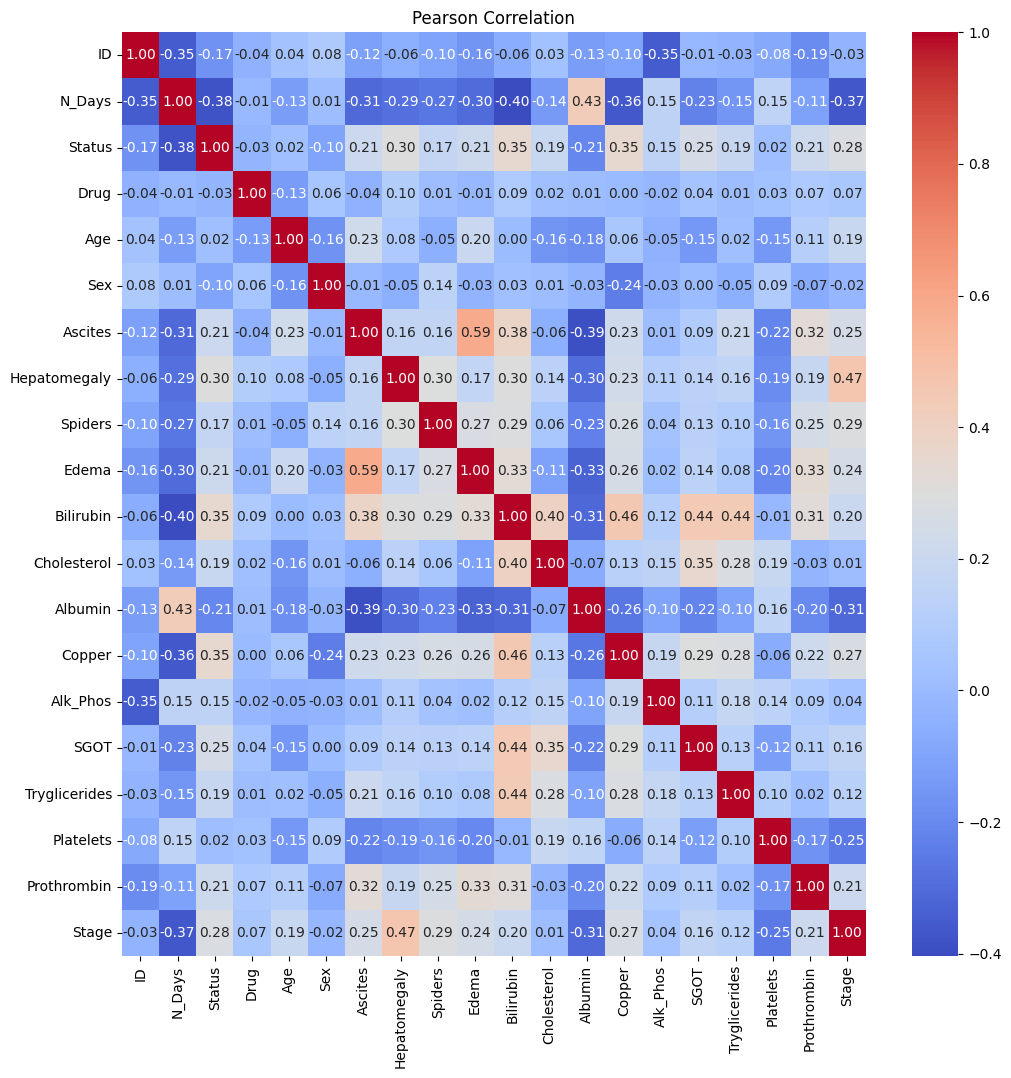

In [ ]:
pearson_corr = data.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation')
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(data, 0.4)
len(set(corr_features))

7

In [ ]:
corr_features

{'Albumin', 'Bilirubin', 'Copper', 'Edema', 'SGOT', 'Stage', 'Tryglicerides'}


**Insights from Pearson Correlational Heatmap:**
features that Cirrhosis disease depends on the most: (descending order)

Edema

Copper

SGOT

Tryglicerides

Albumin



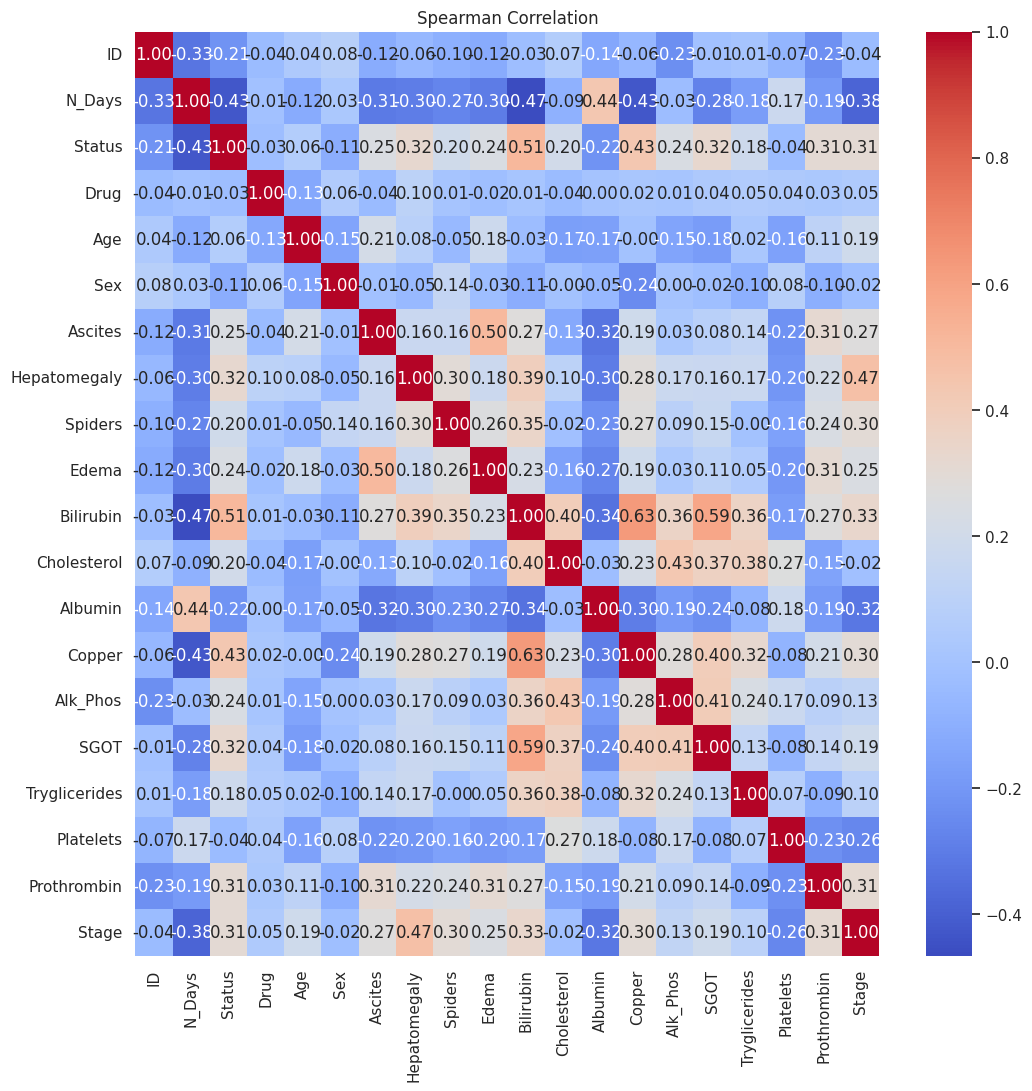

In [ ]:
spearman_corr = data.corr(method='spearman')
plt.figure(figsize=(12,12))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation')
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(data, 0.4)
len(set(corr_features))

9

In [ ]:
corr_features

{'Albumin',
 'Alk_Phos',
 'Bilirubin',
 'Cholesterol',
 'Copper',
 'Edema',
 'SGOT',
 'Stage',
 'Status'}

**Insights from Spearman Correlational Heatmap:**

features that MetabolicSyndrome depends on the most: (descending order)

Copper

SGOT

Bilirubin

Edema

Albumin


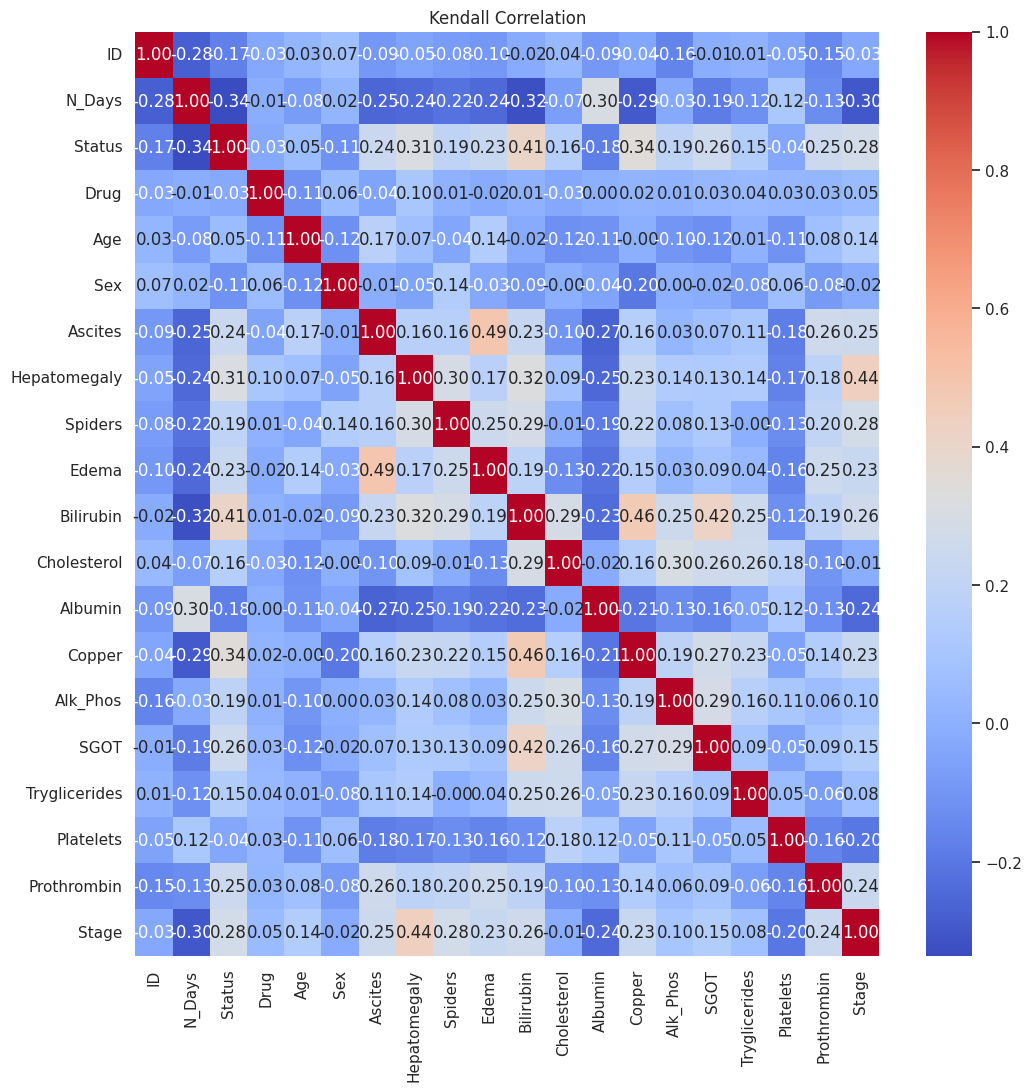

In [ ]:
kendall_corr = data.corr(method='kendall')
plt.figure(figsize=(12,12))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Correlation')
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='kendall')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(data, 0.4)
len(set(corr_features))

5

In [ ]:
corr_features

{'Bilirubin', 'Copper', 'Edema', 'SGOT', 'Stage'}

**Insights from kendall Correlational Heatmap:**

features that MetabolicSyndrome depends on the most: (descending order)

Edema

Copper

SGOT

Bilirubin

Albumin

**Overall Insights from Correlational Matrices:**

features that Cirrhosis disease depends on the most: (descending order)

Edema

Copper

SGOT

Bilirubin

Albumin

specifically, we see that the listed are the most crucial features of the dataset.

we can see this from the fact that cirrhosis is coreliant on all of these factors:

Edema Presence affects the stage of disease

Copper since a higher copper increases the stage

SGOT level affects the stage of disease

Bilirubin increases the statge

Albumin presence increases the stage of disease

**Checking the Skewness**

In [ ]:
list(data.skew(axis=0)) # finding skewness of columns based on rows, and converting to list for easy access

[0.0,
 0.4726020506759292,
 0.7830657288209751,
 0.02576717963384155,
 0.08685015608405514,
 -2.5817526905083157,
 3.1907873369036084,
 -0.05154707176862082,
 0.938365402433318,
 2.5175453536483805,
 2.717610708740455,
 3.408525855721416,
 -0.4675265141762801,
 2.3036399957832616,
 2.9928343153496115,
 1.4491969235882083,
 2.5239024664577845,
 0.6270977603715678,
 2.223276154109735,
 -0.49627341798543223]

Based on skew results column-wise, we see that the majority of columns are **Moderately skewed (10)** while the remaining are **highly skewed (10)**

**all columns except 4 are rightly-skewed**, meaning mean of the column > median of the column :

this would be interpreted as columns having majority values below median but some outliers existing which pull the mean beyond median.

**the remaining 4 are leftly-skewed**, meaning mean of the column < median of the column :

this would be interpreted as columns having majority values above median but some outliers existing which pull the mean beyond median.


**reducing skewness:**

for moderately-skewed: transforming under square-rooted/cubed transform : x^^(1/2) or x^^(1/3)

for highly-skewed: transforming under logarithmic transform : log(x) base b

**4. Detect Outliers(don't remove)**

In [ ]:

IQR_score = {} # holds entire framework of IQR tested outliers

for column in data.columns:
    Q1 = data[column].quantile(0.25) # 1st Quartile
    Q3 = data[column].quantile(0.75) # 3rd Quartile

    IQR = Q3 - Q1 # difference of quartiles : equivalent to boxplot's central distribution mass

    outliers = data[(data[column] < Q1-1.5*IQR) | (data[column] > Q3+1.5*IQR)][column] # judging values greater than 3rduartile and below 1st quartile as outliers

    if not outliers.empty:
        IQR_score[column] = outliers # storing outliers


**5. Detect Class Label Imbalance**

we have previously identified class imbalance using histograms for following features with high imbalance:
*   Status
*   Sex
*   Ascites
*   Spiders
*   Edema





In [ ]:

for i in ['Status','Sex','Ascites','Spiders','Edema']:
    count = data[i].value_counts() # finds count for each class
    print(count)
    print()

Status
0    232
1    161
2     25
Name: count, dtype: int64

Sex
1    374
0     44
Name: count, dtype: int64

Ascites
0.0    288
1.0     24
Name: count, dtype: int64

Spiders
0.0    222
1.0     90
Name: count, dtype: int64

Edema
0    354
1     44
2     20
Name: count, dtype: int64





---

